In [249]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from src.utils import (
    process_data_loader,
    print_metrics_in_latex,
    calculate_metrics,
    get_checkpoint_paths,
    mergekfold_results,
    save_normalized_conf_matrices,
    plot_pred_vs_true,
    get_class_dependent_predictions,
    generate_radar_plots,
)

# Specify the path to your pickle file
file_path = "evaluation_metrics/classification_metrics_list.pkl"
with open(file_path, "rb") as file:
    classification_metrics_list = pickle.load(file)

file_path = "evaluation_metrics/regression_metrics_list.pkl"
with open(file_path, "rb") as file:
    regression_metrics_list = pickle.load(file)

file_path = "evaluation_metrics/collect_classification_results.pkl"
with open(file_path, "rb") as file:
    collect_classification_results = pickle.load(file)

file_path = "evaluation_metrics/collect_regression_results.pkl"
with open(file_path, "rb") as file:
    collect_regression_results = pickle.load(file)

In [250]:
def calculate_kfold_mean_and_std(metrics_list):
    df = pd.DataFrame(metrics_list)
    numeric_cols = df.select_dtypes(include=[float]).columns
    grouped_df = df.groupby(["id", "Model", "Combination"])[numeric_cols]
    mean_df = grouped_df.mean()
    std_df = grouped_df.std()
    mean_df.reset_index(inplace=True)
    mean_df.drop(columns="id", inplace=True)
    std_df.reset_index(inplace=True)
    std_df.drop(columns="id", inplace=True)
    return mean_df, std_df


# Calculate mean and std from metric using k-folds
class_mean, class_std = calculate_kfold_mean_and_std(classification_metrics_list)
reg_mean, reg_std = calculate_kfold_mean_and_std(regression_metrics_list)

In [253]:
# Prepare raw results
merged_classification = mergekfold_results(collect_classification_results)
merged_regression = mergekfold_results(collect_regression_results)

In [141]:
merged_classification

,Model,Combination,id,y_pred,y_true,y_true_label
0,clip-noiselesssimpretrain-clipreal+KNN+five,lightcurve,0,"[1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 3.0, 1.0, ...","[0.038, 0.01882, 0.023, 0.02, 0.017, 0.044, 0....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,clip-noiselesssimpretrain-clipreal+KNN+five,lightcurve and spectral,0,"[1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 4.0, 1.0, ...","[0.038, 0.01882, 0.023, 0.02, 0.017, 0.044, 0....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,clip-noiselesssimpretrain-clipreal+KNN+five,spectral,0,"[2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, ...","[0.038, 0.01882, 0.023, 0.02, 0.017, 0.044, 0....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
3,clip-noiselesssimpretrain-clipreal+KNN+three,lightcurve,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...","[0.038, 0.01882, 0.023, 0.02, 0.017, 0.044, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,clip-noiselesssimpretrain-clipreal+KNN+three,lightcurve and spectral,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, ...","[0.038, 0.01882, 0.023, 0.02, 0.017, 0.044, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,clip-noiselesssimpretrain-clipreal+KNN+three,spectral,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.038, 0.01882, 0.023, 0.02, 0.017, 0.044, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,clip-noiselesssimpretrain-clipreal+Linear+five,lightcurve,0,"[1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 3.0, 1.0, ...","[0.038, 0.01882, 0.023, 0.02, 0.017, 0.044, 0....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
7,clip-noiselesssimpretrain-clipreal+Linear+five,lightcurve and spectral,0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.038, 0.01882, 0.023, 0.02, 0.017, 0.044, 0....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
8,clip-noiselesssimpretrain-clipreal+Linear+five,spectral,0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.038, 0.01882, 0.023, 0.02, 0.017, 0.044, 0....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
9,clip-noiselesssimpretrain-clipreal+Linear+three,lightcurve,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...","[0.038, 0.01882, 0.023, 0.02, 0.017, 0.044, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


### Leaderboard for metrics 

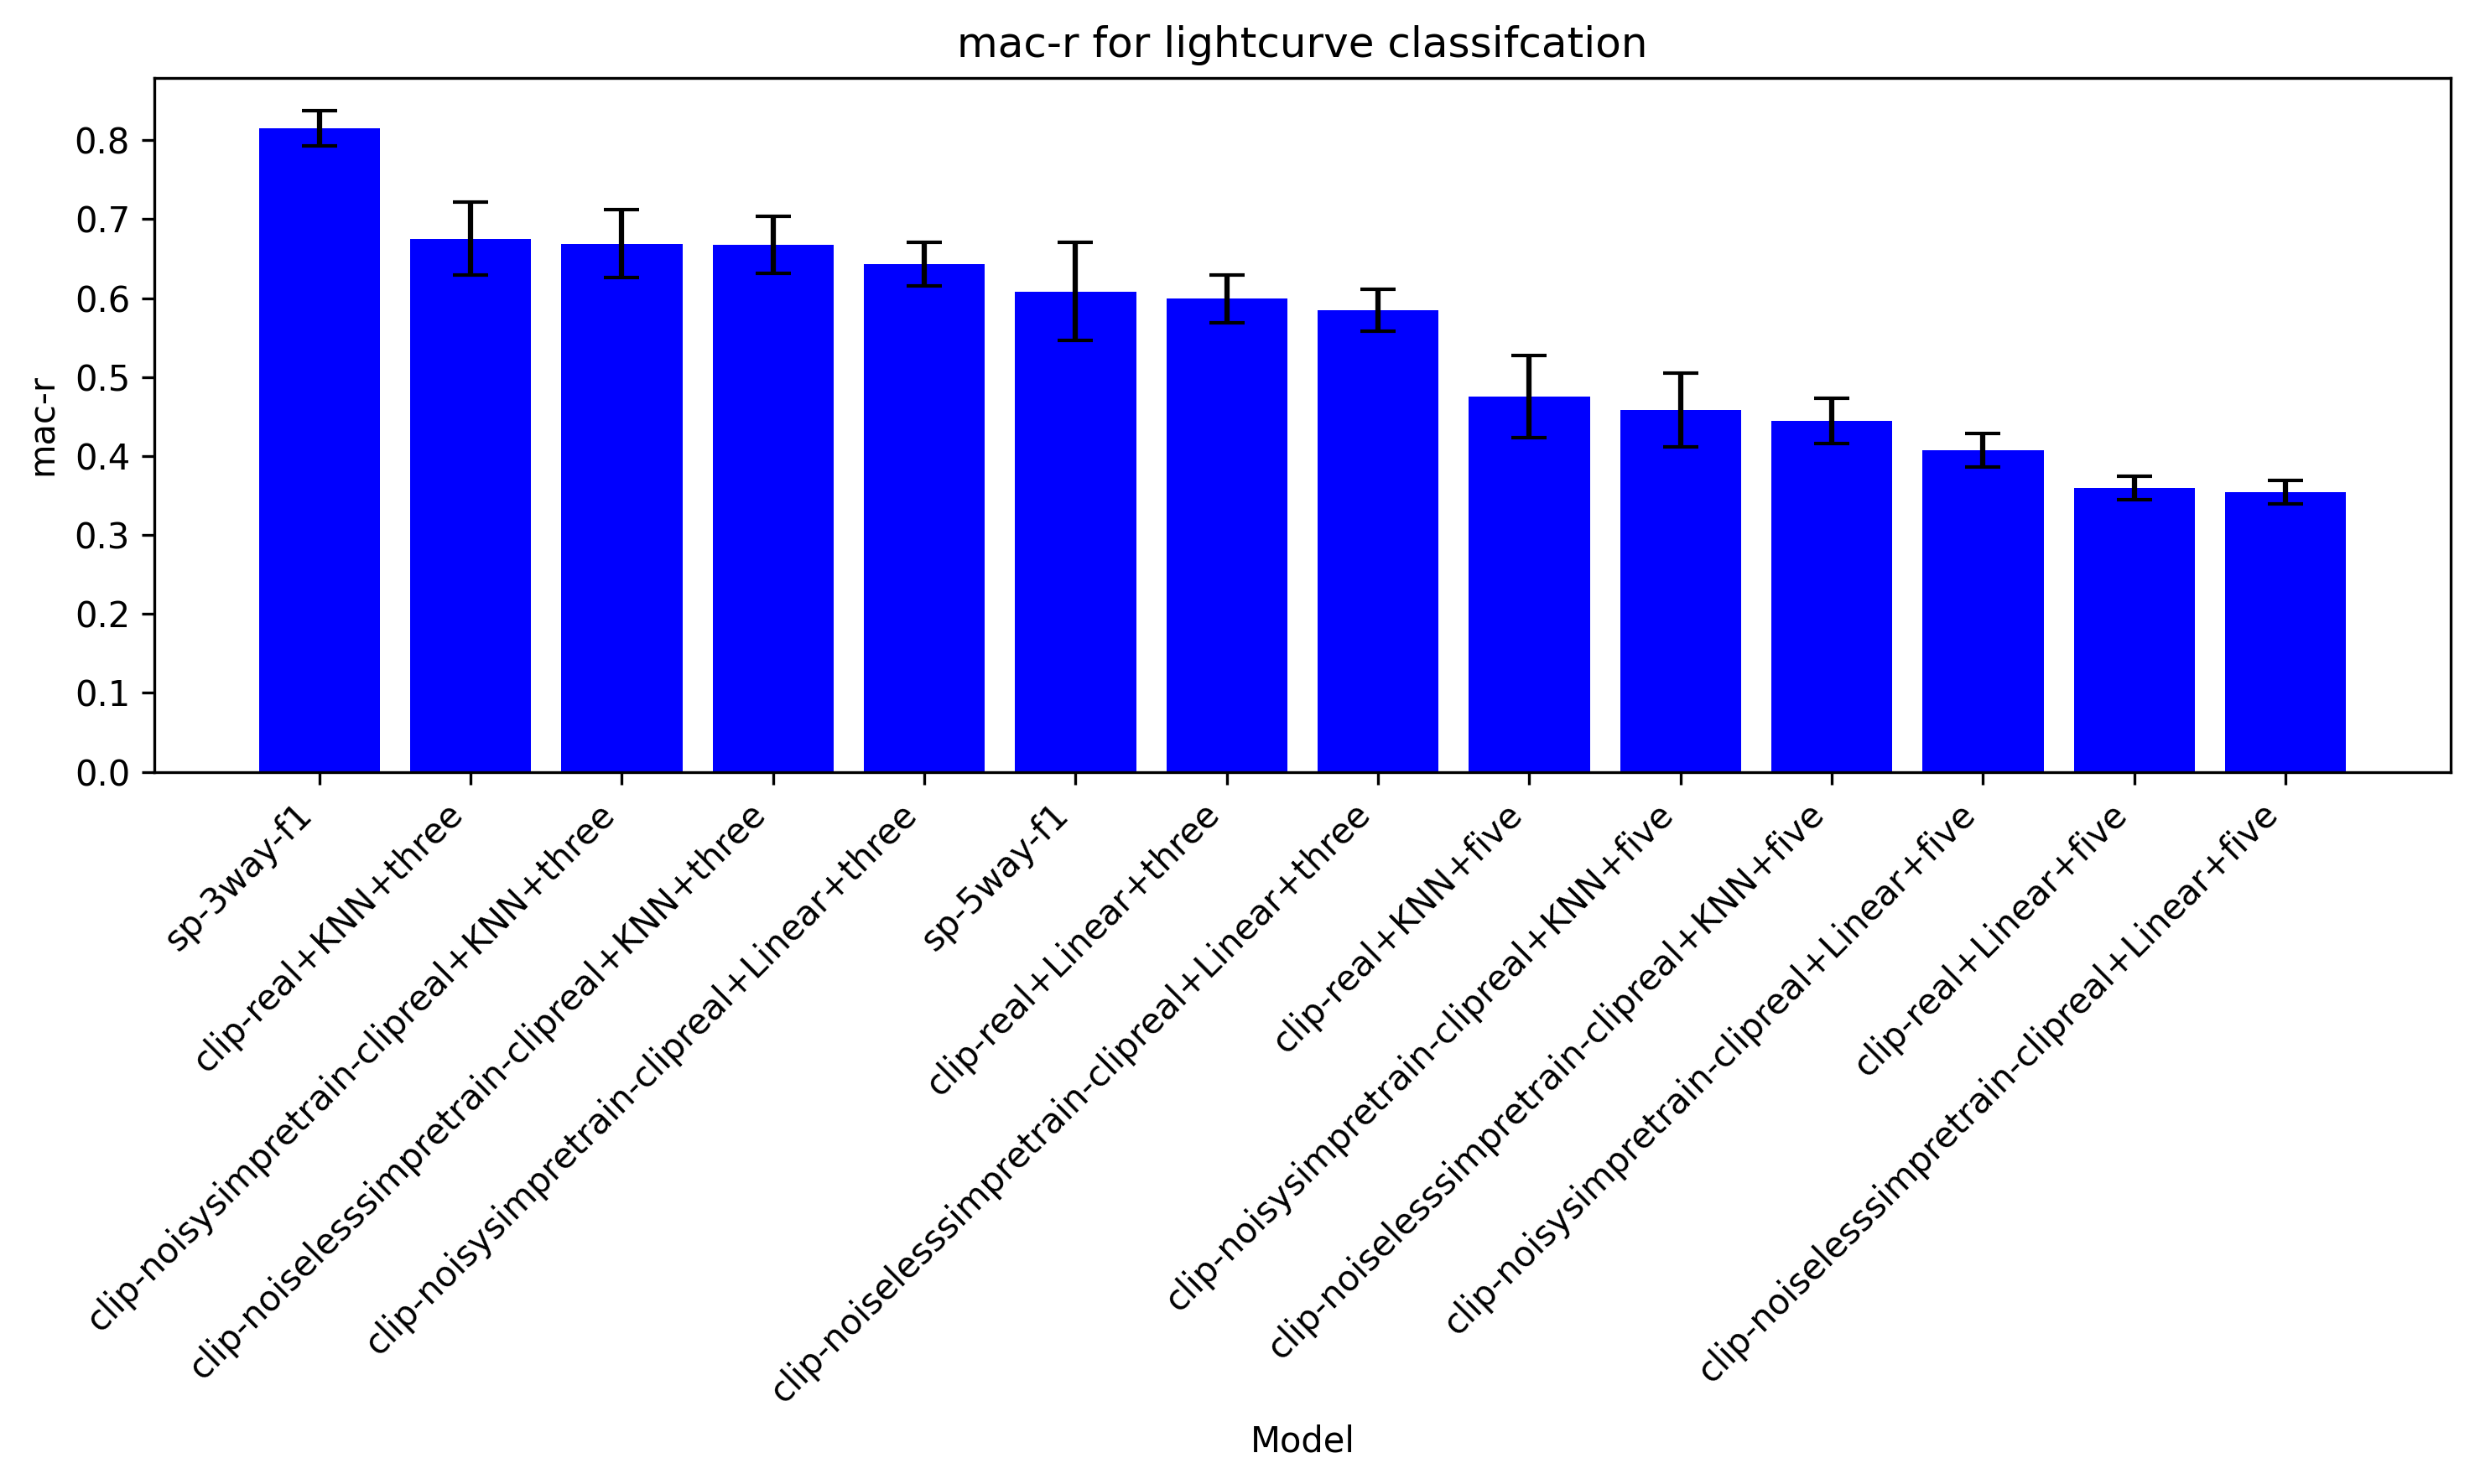

In [142]:
# Leaderboard in different metrics for classifications
# ========================
variable_name = "mac-r"  # Choose from ['mic-f1', 'mic-p', 'mic-r', 'mic-acc', 'mac-f1', 'mac-p', 'mac-r', 'mac-acc']
# ========================

lc_class_mean = class_mean[
    class_mean["Combination"] == "spectral"
]  # .drop(columns=dropcols)
lc_class_std = class_std[
    class_std["Combination"] == "spectral"
]  # .drop(columns=dropcols)
lc_class_mean = lc_class_mean.sort_values(by=variable_name, ascending=False)
lc_class_std = lc_class_std.loc[lc_class_mean.index]
plt.figure(figsize=(10, 6), dpi=300)
plt.bar(
    lc_class_mean["Model"],
    lc_class_mean[variable_name],
    yerr=lc_class_std[variable_name],
    capsize=5,
    color="blue",
)
plt.xlabel("Model")
plt.ylabel(variable_name)
plt.title(f"{variable_name} for lightcurve classifcation")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

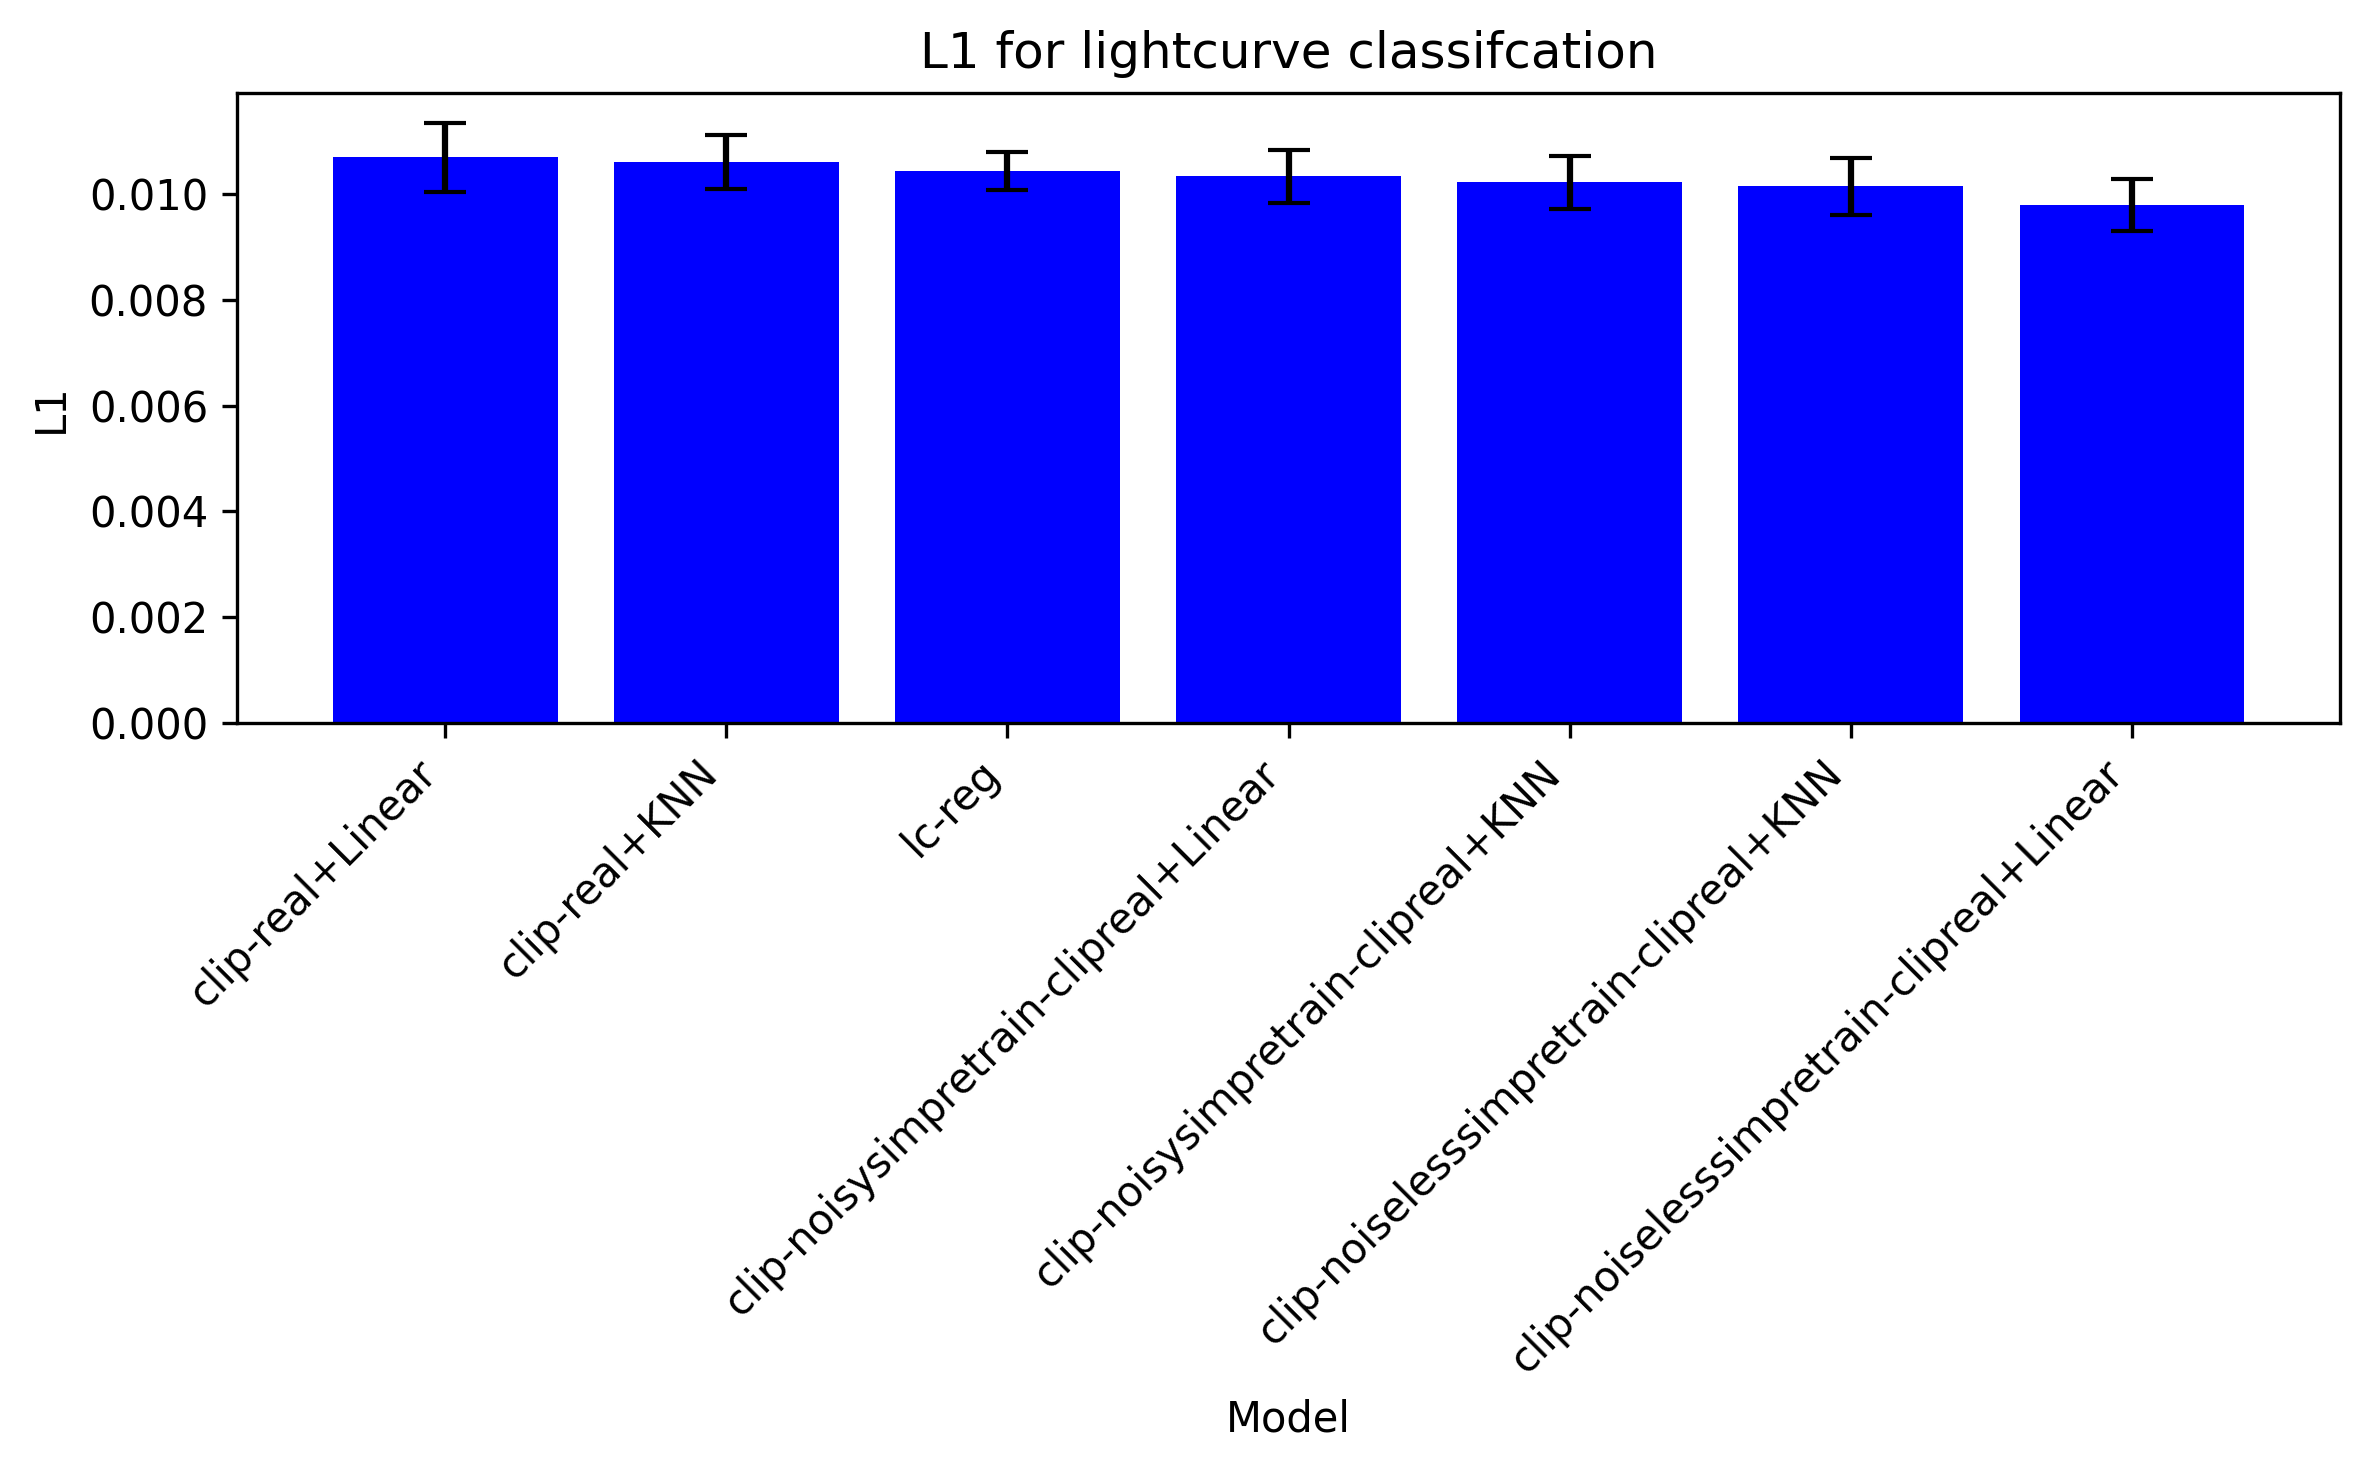

In [143]:
# ========================
variable_name = "L1"  # Choose [ L1	L2	R2	OLF]
# ========================

lc_reg_mean = reg_mean[
    reg_mean["Combination"] == "lightcurve"
]  # .drop(columns=dropcols)
lc_reg_std = reg_std[reg_std["Combination"] == "lightcurve"]  # .drop(columns=dropcols)
lc_reg_mean = lc_reg_mean.sort_values(by=variable_name, ascending=False)
lc_reg_std = lc_reg_std.loc[lc_reg_mean.index]
plt.figure(figsize=(8, 5), dpi=300)
plt.bar(
    lc_reg_mean["Model"],
    lc_reg_mean[variable_name],
    yerr=lc_reg_std[variable_name],
    capsize=5,
    color="blue",
)
plt.xlabel("Model")
plt.ylabel(variable_name)
plt.title(f"{variable_name} for lightcurve classifcation")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

### Classification results analysis - Analysis of redshift of rightly classified SN

In [287]:
def filter_elements(df, target_class):
    """
    Parameters:
    df (pd.DataFrame): The input DataFrame containing model predictions and true labels.
    target_class (float): The target class to filter for.

    Returns:
    pd.DataFrame: A DataFrame containing the filtered cases for the specified target class.
    """
    # Ensure the original 'y_pred' is kept intact for reference
    df["y_pred_all"] = df["y_true"]

    # Function to apply the mask within the arrays
    def filter_arrays(row):
        indices_pos_class = [
            i
            for i, (pred, true_label) in enumerate(
                zip(row["y_pred"], row["y_true_label"])
            )
            if pred == target_class and true_label == target_class
        ]
        indices_all = [
            i
            for i, true_label in enumerate(row["y_true_label"])
            if true_label == target_class
        ]
        return {
            "y_pred": [row["y_pred"][i] for i in indices_pos_class],
            "y_true": [row["y_true"][i] for i in indices_pos_class],
            "y_true_label": [row["y_true_label"][i] for i in indices_pos_class],
            "y_pred_all": [row["y_pred_all"][i] for i in indices_all],
        }

    # Apply the function to each row in the DataFrame
    filtered_data = df.apply(filter_arrays, axis=1)

    # Create a new DataFrame from the filtered data
    result_df = pd.DataFrame(filtered_data.tolist(), index=df.index)

    # Combine the filtered arrays back with the original DataFrame
    final_df = df.drop(columns=["y_pred", "y_true", "y_true_label", "y_pred_all"]).join(
        result_df
    )

    return final_df.reset_index(drop=True)

Filter out the models you want to compare the redshift distribtion

In [295]:
class_filter = 4.0
remove_models = [
    "three",
    "3way",
]  #

lc_merged_classification = merged_classification[
    merged_classification["Combination"] == "lightcurve"
]

# Create a regex pattern from the list of strings
pattern = "|".join(remove_models)

if "three" in remove_models:
    class_names = {
        0: ("SLSN-I", "blue"),
        1: ("SN II", "green"),
        2: ("SN IIn", "teal"),
        3: ("SN Ia", "purple"),
        4: ("SN Ibc", "orange"),
    }
else:
    class_names = {
        0: ("SN II", "green"),
        1: ("SN Ia", "purple"),
        2: ("SN Ibc", "orange"),
    }

# Remove rows where the 'Model' column contains any of the strings in remove_models
df_cleaned = lc_merged_classification[
    ~lc_merged_classification["Model"].str.contains(pattern)
].reset_index()
print("We will work with these models: ")
print(df_cleaned[["Model", "Combination"]])
print(f"and we will remove class {class_names[int(class_filter)][0]}")

We will work with these models: 
                                            Model Combination
0     clip-noiselesssimpretrain-clipreal+KNN+five  lightcurve
1  clip-noiselesssimpretrain-clipreal+Linear+five  lightcurve
2         clip-noisysimpretrain-clipreal+KNN+five  lightcurve
3      clip-noisysimpretrain-clipreal+Linear+five  lightcurve
4                              clip-real+KNN+five  lightcurve
5                           clip-real+Linear+five  lightcurve
6                                      lc-5way-f1  lightcurve
and we will remove class SN Ibc


<Figure size 1000x600 with 0 Axes>

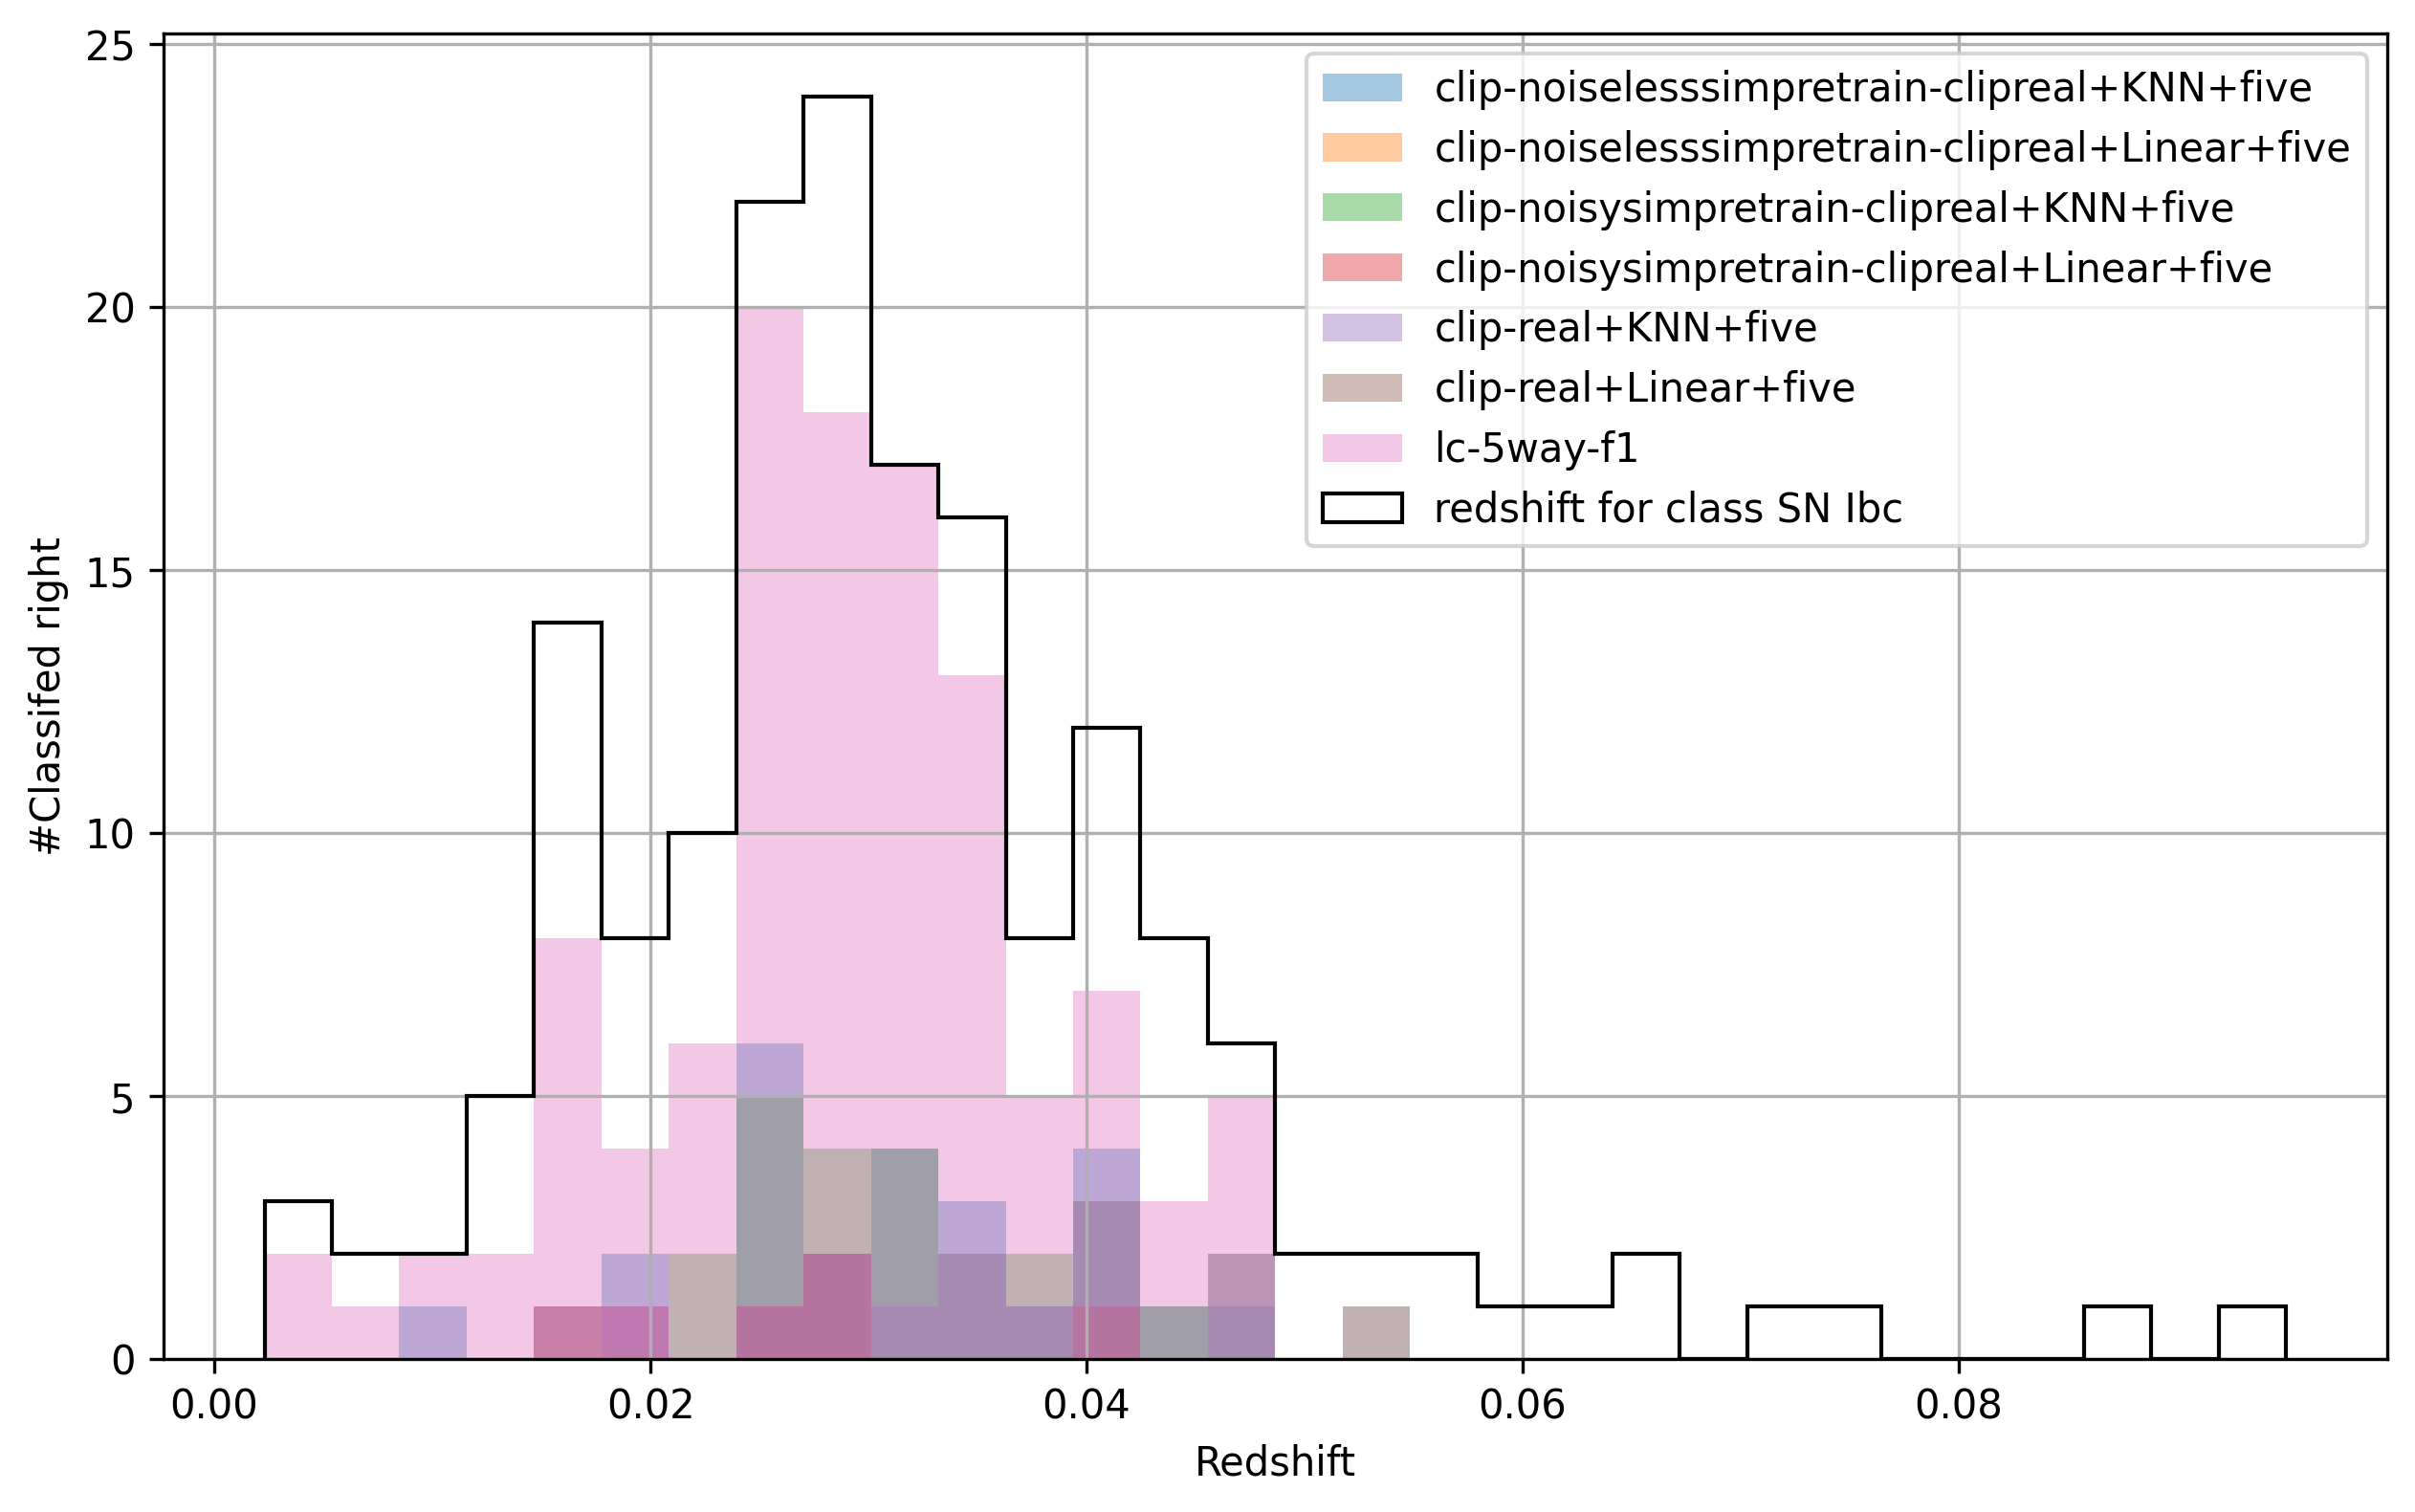

In [296]:
# Filter out classes
filtered_classified = filter_elements(df_cleaned, class_filter)

plt.figure(figsize=(10, 6))

# Determine the number of subplots needed
fig = plt.figure(figsize=(10, 6), dpi=300)

for index, row in filtered_classified.iterrows():
    plt.hist(
        row["y_true"],
        bins=30,
        label=row["Model"],
        range=[min(total_hist), max(total_hist)],
        alpha=0.4,
    )
plt.hist(
    filtered_classified["y_pred_all"][0],
    color="black",
    edgecolor="black",
    bins=30,
    range=[min(total_hist), max(total_hist)],
    label=f"redshift for class {class_names[int(class_filter)][0]}",
    histtype="step",
)
plt.xlabel("Redshift")
plt.ylabel("#Classifed right")
plt.legend()
plt.grid(True)

plt.savefig("redshiftmissclass.pdf")
plt.show()